# Praca inżynierska
## Mateusz Gierlach, 270746

### Predykcja poziomu zapylenia powietrza w Warszawie

#### Promotor: dr inż. Grzegorz Sarwas

## Zakres pracy:
1. Opis problemu zapylenia powietrza w sezonie zimowym w obszarach zurbanizowanych.
2. Przegląd literatury dotyczącej modeli służących do predykcji zapylenia powietrza .
3. Zebranie i analiza dostępnych danych pogodowy i danych o jakości powietrza.
4. Budowa modelu do predykcji zapylenia powietrza w Warszawie w sezonie zimowym.
5. Testy otrzymanego modelu.
6. Podsumowanie.

## 1. Opis problemu

... opis ...

## 2. Przegląd rozwiązań

## 3. Eksploracyjna analiza danych

### 3.1 Obróbka wstępna

#### Stack technologiczny i ustawienia

In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random as rnd

In [16]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 150)

#### Dane pogodowe

In [80]:
df_pog1 = pd.read_csv("input_data/pogoda_s_d.txt", header=None, sep=",")

In [81]:
df_pog2 = pd.read_csv("input_data/pogoda_s_d_t.txt", header=None, sep=",")

In [82]:
df_pog1 = df_pog1.iloc[:,:16]

In [83]:
df_pog1.columns = ["kod_stacji", "nazwa_stacji", "rok", "miesiac", "dzien", "max_temp", "status_tmax",
                  "min_temp", "status_tmin", "sr_temp", "status_tsr", "min_temp_grunt", "status_mtg",
                  "suma_opad", "status_sopad", "rodz_opad"]
df_pog2.columns = ["kod_stacji", "nazwa_stacji", "rok", "miesiac", "dzien", "sr_zachm", "status_sz",
                  "sr_predk_wiatr", "status_spw", "sr_temp", "status_tsr", "sr_cisn", "status_sc",
                  "sr_wilg", "status_swgg", "sr_cisn_stacja", "status_scs", "sr_cisn_morze",
                  "status_scmm", "opad_dzien", "status_od", "opad_noc", "status_on"]

In [84]:
df_pog1 = df_pog1.drop(["kod_stacji", "nazwa_stacji", "status_tmax", "status_tmin", "status_tsr", "status_mtg", "status_sopad"], 
                       axis=1)

df_pog2 = df_pog2.drop(["kod_stacji", "nazwa_stacji", "status_sz", "status_spw", "status_tsr", "status_sc", "status_swgg",
                        "status_scs", "status_scmm", "status_od", "status_on", "sr_temp"], axis=1)

In [85]:
df_pog1 = df_pog1[df_pog1.rok != 2017]
df_pog2 = df_pog2[df_pog2.rok != 2017]

In [86]:
df_pog1

,rok,miesiac,dzien,max_temp,min_temp,sr_temp,min_temp_grunt,suma_opad,rodz_opad
0,2011,1,1,2.3,-2.1,0.9,-3.3,0.1,S
1,2011,1,2,1.7,-1.8,-1.1,-2.9,1.2,S
2,2011,1,3,-1.5,-3.6,-2.9,-4.9,0.3,S
3,2011,1,4,-2.0,-5.1,-4.6,-6.0,0.0,S
4,2011,1,5,-3.5,-12.4,-8.3,-15.5,0.0,NaN
5,2011,1,6,-0.2,-11.7,-5.4,-13.6,1.8,S
6,2011,1,7,5.7,-0.2,3.2,-0.9,0.0,W
...,...,...,...,...,...,...,...,...,...
2185,2016,12,25,4.1,2.1,3.5,1.8,2.3,W
2186,2016,12,26,9.9,3.2,7.7,2.8,1.8,W


In [87]:
df_pog2

,rok,miesiac,dzien,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,sr_cisn_stacja,sr_cisn_morze,opad_dzien,opad_noc
0,2011,1,1,7.1,6.9,5.7,86.8,992.2,1005.5,0.1,0.0
1,2011,1,2,7.4,5.6,4.8,85.3,997.0,1010.4,0.8,0.4
2,2011,1,3,7.3,3.8,4.5,90.1,1004.0,1017.6,0.3,0.0
3,2011,1,4,6.0,2.1,3.7,84.0,1007.3,1021.0,0.0,0.0
4,2011,1,5,6.3,1.6,2.9,88.5,1007.8,1021.7,0.0,0.0
5,2011,1,6,4.6,3.6,3.4,80.5,1000.7,1014.4,0.0,1.8
6,2011,1,7,7.6,2.9,6.8,87.9,999.3,1012.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2185,2016,12,25,6.8,4.4,7.0,88.5,1001.9,1015.1,0.1,2.2
2186,2016,12,26,7.4,5.4,9.4,88.8,1001.8,1014.8,1.8,0.0


In [88]:
df_pog1.iloc[:,0:3].equals(df_pog2.iloc[:,0:3])

True

In [89]:
df_pog = pd.concat([df_pog1, df_pog2.iloc[:,3:]], axis=1)

In [90]:
df_pog

,rok,miesiac,dzien,max_temp,min_temp,sr_temp,min_temp_grunt,suma_opad,rodz_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,sr_cisn_stacja,sr_cisn_morze,opad_dzien,opad_noc
0,2011,1,1,2.3,-2.1,0.9,-3.3,0.1,S,7.1,6.9,5.7,86.8,992.2,1005.5,0.1,0.0
1,2011,1,2,1.7,-1.8,-1.1,-2.9,1.2,S,7.4,5.6,4.8,85.3,997.0,1010.4,0.8,0.4
2,2011,1,3,-1.5,-3.6,-2.9,-4.9,0.3,S,7.3,3.8,4.5,90.1,1004.0,1017.6,0.3,0.0
3,2011,1,4,-2.0,-5.1,-4.6,-6.0,0.0,S,6.0,2.1,3.7,84.0,1007.3,1021.0,0.0,0.0
4,2011,1,5,-3.5,-12.4,-8.3,-15.5,0.0,NaN,6.3,1.6,2.9,88.5,1007.8,1021.7,0.0,0.0
5,2011,1,6,-0.2,-11.7,-5.4,-13.6,1.8,S,4.6,3.6,3.4,80.5,1000.7,1014.4,0.0,1.8
6,2011,1,7,5.7,-0.2,3.2,-0.9,0.0,W,7.6,2.9,6.8,87.9,999.3,1012.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2016,12,25,4.1,2.1,3.5,1.8,2.3,W,6.8,4.4,7.0,88.5,1001.9,1015.1,0.1,2.2
2186,2016,12,26,9.9,3.2,7.7,2.8,1.8,W,7.4,5.4,9.4,88.8,1001.8,1014.8,1.8,0.0


#### Dane smogowe

In [91]:
df_pm10 = pd.read_csv("input_data/pm10.csv", sep=";", decimal=",")

In [92]:
df_pm10.head(7)

,data,godzina,pm10_niepodleglosci,pm10_wokalna
0,01.01.2011,01:00:00,67.5,41.0
1,01.01.2011,02:00:00,54.6,31.4
2,01.01.2011,03:00:00,46.5,21.8
3,01.01.2011,04:00:00,33.7,20.3
4,01.01.2011,05:00:00,30.3,19.2
5,01.01.2011,06:00:00,29.8,18.3
6,01.01.2011,07:00:00,26.7,14.4


In [93]:
df_pm10.godzina = df_pm10.godzina.str[0:2]

In [94]:
df_pm25 = pd.read_csv("input_data/pm25.csv", sep=";", decimal=",")

In [95]:
df_pm25.godzina = df_pm25.godzina.str[0:2]

In [96]:
df_pm25.head(7)

,data,godzina,pm25_niepodleglosci,pm25_wokalna
0,01.01.2011,01,56.4,33.4
1,01.01.2011,02,41.0,30.7
2,01.01.2011,03,31.9,25.5
3,01.01.2011,04,28.4,16.2
4,01.01.2011,05,27.9,14.9
5,01.01.2011,06,23.6,13.6
6,01.01.2011,07,21.1,12.9


In [97]:
df_pm10.shape

(52608, 4)

In [98]:
df_pm25.shape

(52608, 4)

In [99]:
df_pm10.iloc[:,0:2].equals(df_pm25.iloc[:,0:2])

True

In [100]:
df_pm = pd.concat([df_pm10, df_pm25.iloc[:,2:]], axis=1)

In [101]:
df_pm.head(26)

,data,godzina,pm10_niepodleglosci,pm10_wokalna,pm25_niepodleglosci,pm25_wokalna
0,01.01.2011,01,67.5,41.0,56.4,33.4
1,01.01.2011,02,54.6,31.4,41.0,30.7
2,01.01.2011,03,46.5,21.8,31.9,25.5
3,01.01.2011,04,33.7,20.3,28.4,16.2
4,01.01.2011,05,30.3,19.2,27.9,14.9
5,01.01.2011,06,29.8,18.3,23.6,13.6
6,01.01.2011,07,26.7,14.4,21.1,12.9
...,...,...,...,...,...,...
19,01.01.2011,20,17.0,10.9,13.3,13.0
20,01.01.2011,21,17.6,10.9,10.6,12.1


In [102]:
godziny = df_pm["godzina"].unique()

In [103]:
godziny

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '00'], dtype=object)

In [104]:
indeks_pm = df_pm.columns[2:]

In [105]:
indeks_pm

Index(['pm10_niepodleglosci', 'pm10_wokalna', 'pm25_niepodleglosci',
       'pm25_wokalna'],
      dtype='object')

In [106]:
srednie_pm = pd.DataFrame(np.random.randn(4,24), index=indeks_pm, columns=godziny)

In [107]:
# srednie dla godzin
for i in range(srednie_pm.shape[1]) :
    sr = df_pm[df_pm["godzina"].isin([srednie_pm.columns[i]])].mean()
    for j in range(srednie_pm.shape[0]) :
        srednie_pm.iloc[j,i] = sr[j]

In [108]:
srednie_pm

,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,00
pm10_niepodleglosci,39.085410,37.103934,35.678677,34.997884,35.448649,38.100741,42.154118,45.080730,45.987619,44.934158,43.654021,42.868281,42.331327,42.450738,42.199094,42.430997,42.811368,43.207098,44.185387,45.798214,46.581227,45.814581,45.038332,42.265555
pm10_wokalna,36.213252,35.262282,34.256482,33.289867,32.690531,32.467231,32.949061,33.200124,32.580670,31.157279,29.960368,28.520499,27.941028,27.525526,27.757339,28.358472,29.192122,30.789196,32.682317,34.971068,36.607230,37.364725,37.480440,37.151496
pm25_niepodleglosci,29.380517,28.395094,27.625678,26.945694,26.910224,27.583019,28.677171,29.189621,28.593810,27.642948,26.825553,26.041726,25.614786,25.372865,25.408643,25.860966,26.248806,27.192345,28.320184,29.629222,30.679870,31.066569,31.029309,30.231573
pm25_wokalna,28.503856,27.994030,27.461162,26.777837,26.061297,25.427605,24.784739,24.172337,23.512649,22.450307,21.282835,20.125930,19.489729,18.869533,18.612879,18.721009,19.401613,20.616154,22.083260,24.106150,25.931732,27.230988,28.115925,28.526474


In [109]:
srednie_pm_T = srednie_pm.T

In [110]:
srednie_pm_T

,pm10_niepodleglosci,pm10_wokalna,pm25_niepodleglosci,pm25_wokalna
01,39.085410,36.213252,29.380517,28.503856
02,37.103934,35.262282,28.395094,27.994030
03,35.678677,34.256482,27.625678,27.461162
04,34.997884,33.289867,26.945694,26.777837
05,35.448649,32.690531,26.910224,26.061297
06,38.100741,32.467231,27.583019,25.427605
07,42.154118,32.949061,28.677171,24.784739
...,...,...,...,...
18,43.207098,30.789196,27.192345,20.616154
19,44.185387,32.682317,28.320184,22.083260


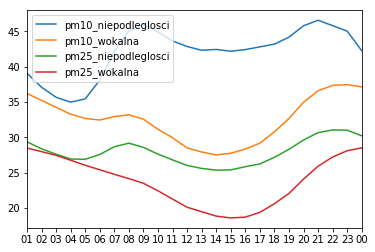

In [111]:
srednie_pm.T.plot(xticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0])

Tak naprawde interesuje nas 8 rano i sr dla calego dnia

In [112]:
df_pm

,data,godzina,pm10_niepodleglosci,pm10_wokalna,pm25_niepodleglosci,pm25_wokalna
0,01.01.2011,01,67.5000,41.000000,56.400000,33.400000
1,01.01.2011,02,54.6000,31.400000,41.000000,30.700000
2,01.01.2011,03,46.5000,21.800000,31.900000,25.500000
3,01.01.2011,04,33.7000,20.300000,28.400000,16.200000
4,01.01.2011,05,30.3000,19.200000,27.900000,14.900000
5,01.01.2011,06,29.8000,18.300000,23.600000,13.600000
6,01.01.2011,07,26.7000,14.400000,21.100000,12.900000
...,...,...,...,...,...,...
52601,31.12.2016,18,53.6048,50.600006,50.365715,38.903452
52602,31.12.2016,19,54.6488,54.900007,51.317097,42.331325


In [113]:
df_pm_mala = df_pm.iloc[0:1,:]

In [114]:
df_pm_mala.columns = ["data", "godzina","pm10_sr_niep", "pm10_sr_wok", "pm25_sr_niep", "pm25_sr_wok"]

df_pm_mala["pm10_8_niep"] = 0
df_pm_mala["pm10_8_wok"] = 0
df_pm_mala["pm25_8_niep"] = 0
df_pm_mala["pm25_8_wok"] = 0

df_pm_mala = df_pm_mala.drop('godzina', 1)

df_pm_mala[:] = 0

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [115]:
df_pm_mala

,data,pm10_sr_niep,pm10_sr_wok,pm25_sr_niep,pm25_sr_wok,pm10_8_niep,pm10_8_wok,pm25_8_niep,pm25_8_wok
0,0,0.0,0.0,0.0,0.0,0,0,0,0


In [116]:
daty = df_pm["data"].unique()
print(daty)

['01.01.2011' '02.01.2011' '03.01.2011' ..., '30.12.2016' '31.12.2016'
 '01.01.2017']


In [117]:
len(daty)

2193

In [118]:
for i in range(len(daty)-1):
    df_pm_mala.loc[i,"data"] = daty[i]
    df_pm_mala.loc[i,"pm10_sr_niep"] = df_pm[df_pm["data"].isin([daty[i]])]["pm10_niepodleglosci"].mean()
    df_pm_mala.loc[i,"pm10_sr_wok"] = df_pm[df_pm["data"].isin([daty[i]])]["pm10_wokalna"].mean()
    df_pm_mala.loc[i,"pm25_sr_niep"] = df_pm[df_pm["data"].isin([daty[i]])]["pm25_niepodleglosci"].mean()
    df_pm_mala.loc[i,"pm25_sr_wok"] = df_pm[df_pm["data"].isin([daty[i]])]["pm25_wokalna"].mean()
    df_pm_mala.loc[i,"pm10_8_niep"] = df_pm[df_pm["data"].isin([daty[i]])][df_pm["godzina"].isin(["08"])]["pm10_niepodleglosci"].values[0]
    df_pm_mala.loc[i,"pm10_8_wok"] = df_pm[df_pm["data"].isin([daty[i]])][df_pm["godzina"].isin(["08"])]["pm10_wokalna"].values[0]
    df_pm_mala.loc[i,"pm25_8_niep"] = df_pm[df_pm["data"].isin([daty[i]])][df_pm["godzina"].isin(["08"])]["pm25_niepodleglosci"].values[0]
    df_pm_mala.loc[i,"pm25_8_wok"] = df_pm[df_pm["data"].isin([daty[i]])][df_pm["godzina"].isin(["08"])]["pm25_wokalna"].values[0]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [119]:
df_pm_mala

,data,pm10_sr_niep,pm10_sr_wok,pm25_sr_niep,pm25_sr_wok,pm10_8_niep,pm10_8_wok,pm25_8_niep,pm25_8_wok
0,01.01.2011,25.395652,13.726087,21.182609,15.813043,22.2000,12.400000,20.300000,19.800000
1,02.01.2011,20.266667,17.508333,13.600000,14.312500,10.6000,9.400000,7.000000,7.600000
2,03.01.2011,33.333333,22.437500,27.470833,23.920833,40.7000,26.600000,29.900000,23.300000
3,04.01.2011,40.454167,29.191667,36.000000,28.591667,32.1000,22.600000,30.900000,21.100000
4,05.01.2011,88.383333,74.341667,79.829167,77.637500,93.3000,79.000000,87.400000,87.800000
5,06.01.2011,56.837500,45.125000,50.995833,52.737500,59.9000,47.800000,57.200000,61.500000
6,07.01.2011,56.412500,30.737500,43.612500,32.870000,49.0000,18.600000,33.400000,19.300000
...,...,...,...,...,...,...,...,...,...
2185,25.12.2016,22.367450,20.295836,21.203225,15.847437,12.1580,10.900001,11.993322,8.995262
2186,26.12.2016,18.469850,14.975002,17.688398,11.958943,16.3340,11.700001,15.904558,9.423746


In [120]:
df_pm_mala.to_csv("df_pm_mala.csv")

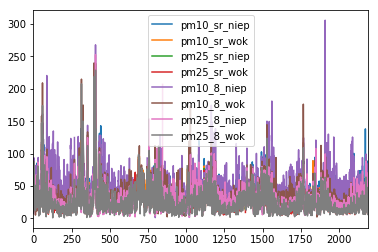

In [121]:
df_pm_mala.plot()

In [122]:
df_pm_mala.head(5)

,data,pm10_sr_niep,pm10_sr_wok,pm25_sr_niep,pm25_sr_wok,pm10_8_niep,pm10_8_wok,pm25_8_niep,pm25_8_wok
0,01.01.2011,25.395652,13.726087,21.182609,15.813043,22.2,12.4,20.3,19.8
1,02.01.2011,20.266667,17.508333,13.600000,14.312500,10.6,9.4,7.0,7.6
2,03.01.2011,33.333333,22.437500,27.470833,23.920833,40.7,26.6,29.9,23.3
3,04.01.2011,40.454167,29.191667,36.000000,28.591667,32.1,22.6,30.9,21.1
4,05.01.2011,88.383333,74.341667,79.829167,77.637500,93.3,79.0,87.4,87.8


In [123]:
df_pm_mala["dzien"] = df_pm_mala["data"].str[0:2]
df_pm_mala["miesiac"] = df_pm_mala["data"].str[3:5]
df_pm_mala["rok"] = df_pm_mala["data"].str[6:]

In [124]:
df_pm_mala = df_pm_mala.drop("data", 1)

In [125]:
df_pm_mala["rok"] = pd.to_numeric(df_pm_mala["rok"], errors='coerce')
df_pm_mala["miesiac"] = pd.to_numeric(df_pm_mala["miesiac"], errors='coerce')
df_pm_mala["dzien"] = pd.to_numeric(df_pm_mala["dzien"], errors='coerce')

In [126]:
df_pm_mala.columns.tolist()

['pm10_sr_niep',
 'pm10_sr_wok',
 'pm25_sr_niep',
 'pm25_sr_wok',
 'pm10_8_niep',
 'pm10_8_wok',
 'pm25_8_niep',
 'pm25_8_wok',
 'dzien',
 'miesiac',
 'rok']

In [127]:
kolumny_pm = ['rok', 'miesiac', 'dzien',
'pm10_sr_niep',
 'pm10_sr_wok',
 'pm25_sr_niep',
 'pm25_sr_wok',
 'pm10_8_niep',
 'pm10_8_wok',
 'pm25_8_niep',
 'pm25_8_wok']

In [128]:
df_pm_mala = df_pm_mala[kolumny_pm]

### Wspolne

In [129]:
df_pm_mala.head(5)

,rok,miesiac,dzien,pm10_sr_niep,pm10_sr_wok,pm25_sr_niep,pm25_sr_wok,pm10_8_niep,pm10_8_wok,pm25_8_niep,pm25_8_wok
0,2011,1,1,25.395652,13.726087,21.182609,15.813043,22.2,12.4,20.3,19.8
1,2011,1,2,20.266667,17.508333,13.600000,14.312500,10.6,9.4,7.0,7.6
2,2011,1,3,33.333333,22.437500,27.470833,23.920833,40.7,26.6,29.9,23.3
3,2011,1,4,40.454167,29.191667,36.000000,28.591667,32.1,22.6,30.9,21.1
4,2011,1,5,88.383333,74.341667,79.829167,77.637500,93.3,79.0,87.4,87.8


In [130]:
df_pog.head(5)

,rok,miesiac,dzien,max_temp,min_temp,sr_temp,min_temp_grunt,suma_opad,rodz_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,sr_cisn_stacja,sr_cisn_morze,opad_dzien,opad_noc
0,2011,1,1,2.3,-2.1,0.9,-3.3,0.1,S,7.1,6.9,5.7,86.8,992.2,1005.5,0.1,0.0
1,2011,1,2,1.7,-1.8,-1.1,-2.9,1.2,S,7.4,5.6,4.8,85.3,997.0,1010.4,0.8,0.4
2,2011,1,3,-1.5,-3.6,-2.9,-4.9,0.3,S,7.3,3.8,4.5,90.1,1004.0,1017.6,0.3,0.0
3,2011,1,4,-2.0,-5.1,-4.6,-6.0,0.0,S,6.0,2.1,3.7,84.0,1007.3,1021.0,0.0,0.0
4,2011,1,5,-3.5,-12.4,-8.3,-15.5,0.0,NaN,6.3,1.6,2.9,88.5,1007.8,1021.7,0.0,0.0


In [131]:
df_pog.iloc[:,0:3].equals(df_pm_mala.iloc[:,0:3])

True

In [132]:
df_smog = df_pm_mala.iloc[:,3:]

In [133]:
df_smog

,pm10_sr_niep,pm10_sr_wok,pm25_sr_niep,pm25_sr_wok,pm10_8_niep,pm10_8_wok,pm25_8_niep,pm25_8_wok
0,25.395652,13.726087,21.182609,15.813043,22.2000,12.400000,20.300000,19.800000
1,20.266667,17.508333,13.600000,14.312500,10.6000,9.400000,7.000000,7.600000
2,33.333333,22.437500,27.470833,23.920833,40.7000,26.600000,29.900000,23.300000
3,40.454167,29.191667,36.000000,28.591667,32.1000,22.600000,30.900000,21.100000
4,88.383333,74.341667,79.829167,77.637500,93.3000,79.000000,87.400000,87.800000
5,56.837500,45.125000,50.995833,52.737500,59.9000,47.800000,57.200000,61.500000
6,56.412500,30.737500,43.612500,32.870000,49.0000,18.600000,33.400000,19.300000
...,...,...,...,...,...,...,...,...
2185,22.367450,20.295836,21.203225,15.847437,12.1580,10.900001,11.993322,8.995262
2186,18.469850,14.975002,17.688398,11.958943,16.3340,11.700001,15.904558,9.423746


In [134]:
df_pog

,rok,miesiac,dzien,max_temp,min_temp,sr_temp,min_temp_grunt,suma_opad,rodz_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,sr_cisn_stacja,sr_cisn_morze,opad_dzien,opad_noc
0,2011,1,1,2.3,-2.1,0.9,-3.3,0.1,S,7.1,6.9,5.7,86.8,992.2,1005.5,0.1,0.0
1,2011,1,2,1.7,-1.8,-1.1,-2.9,1.2,S,7.4,5.6,4.8,85.3,997.0,1010.4,0.8,0.4
2,2011,1,3,-1.5,-3.6,-2.9,-4.9,0.3,S,7.3,3.8,4.5,90.1,1004.0,1017.6,0.3,0.0
3,2011,1,4,-2.0,-5.1,-4.6,-6.0,0.0,S,6.0,2.1,3.7,84.0,1007.3,1021.0,0.0,0.0
4,2011,1,5,-3.5,-12.4,-8.3,-15.5,0.0,NaN,6.3,1.6,2.9,88.5,1007.8,1021.7,0.0,0.0
5,2011,1,6,-0.2,-11.7,-5.4,-13.6,1.8,S,4.6,3.6,3.4,80.5,1000.7,1014.4,0.0,1.8
6,2011,1,7,5.7,-0.2,3.2,-0.9,0.0,W,7.6,2.9,6.8,87.9,999.3,1012.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2016,12,25,4.1,2.1,3.5,1.8,2.3,W,6.8,4.4,7.0,88.5,1001.9,1015.1,0.1,2.2
2186,2016,12,26,9.9,3.2,7.7,2.8,1.8,W,7.4,5.4,9.4,88.8,1001.8,1014.8,1.8,0.0


In [138]:
df_pog.to_csv("gotowe_dane/df_pog.csv", index=False)
df_smog.to_csv("gotowe_dane/df_smog.csv", index=False)

### 3.2. Eksploracja

In [70]:
df_pog = pd.read_csv("gotowe_dane/df_pog.csv", sep=",")
df_smog = pd.read_csv("gotowe_dane/df_smog.csv", sep=",")

In [18]:
df_pog.head(5)

,rok,miesiac,dzien,max_temp,min_temp,sr_temp,min_temp_grunt,suma_opad,rodz_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,sr_cisn_stacja,sr_cisn_morze,opad_dzien,opad_noc
0,2011,1,1,2.3,-2.1,0.9,-3.3,0.1,S,7.1,6.9,5.7,86.8,992.2,1005.5,0.1,0.0
1,2011,1,2,1.7,-1.8,-1.1,-2.9,1.2,S,7.4,5.6,4.8,85.3,997.0,1010.4,0.8,0.4
2,2011,1,3,-1.5,-3.6,-2.9,-4.9,0.3,S,7.3,3.8,4.5,90.1,1004.0,1017.6,0.3,0.0
3,2011,1,4,-2.0,-5.1,-4.6,-6.0,0.0,S,6.0,2.1,3.7,84.0,1007.3,1021.0,0.0,0.0
4,2011,1,5,-3.5,-12.4,-8.3,-15.5,0.0,NaN,6.3,1.6,2.9,88.5,1007.8,1021.7,0.0,0.0


In [19]:
df_smog.head(5)

,pm10_sr_niep,pm10_sr_wok,pm25_sr_niep,pm25_sr_wok,pm10_8_niep,pm10_8_wok,pm25_8_niep,pm25_8_wok
0,25.395652,13.726087,21.182609,15.813043,22.2,12.4,20.3,19.8
1,20.266667,17.508333,13.600000,14.312500,10.6,9.4,7.0,7.6
2,33.333333,22.437500,27.470833,23.920833,40.7,26.6,29.9,23.3
3,40.454167,29.191667,36.000000,28.591667,32.1,22.6,30.9,21.1
4,88.383333,74.341667,79.829167,77.637500,93.3,79.0,87.4,87.8


In [20]:
print(df_pog.shape)
print(df_smog.shape)

(2192, 17)
(2192, 8)


In [71]:
df = pd.concat([df_pog, df_smog], axis=1)

In [22]:
df.head(10)

,rok,miesiac,dzien,max_temp,min_temp,sr_temp,min_temp_grunt,suma_opad,rodz_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,sr_cisn_stacja,sr_cisn_morze,opad_dzien,opad_noc,pm10_sr_niep,pm10_sr_wok,pm25_sr_niep,pm25_sr_wok,pm10_8_niep,pm10_8_wok,pm25_8_niep,pm25_8_wok
0,2011,1,1,2.3,-2.1,0.9,-3.3,0.1,S,7.1,6.9,5.7,86.8,992.2,1005.5,0.1,0.0,25.395652,13.726087,21.182609,15.813043,22.2,12.4,20.3,19.8
1,2011,1,2,1.7,-1.8,-1.1,-2.9,1.2,S,7.4,5.6,4.8,85.3,997.0,1010.4,0.8,0.4,20.266667,17.508333,13.600000,14.312500,10.6,9.4,7.0,7.6
2,2011,1,3,-1.5,-3.6,-2.9,-4.9,0.3,S,7.3,3.8,4.5,90.1,1004.0,1017.6,0.3,0.0,33.333333,22.437500,27.470833,23.920833,40.7,26.6,29.9,23.3
3,2011,1,4,-2.0,-5.1,-4.6,-6.0,0.0,S,6.0,2.1,3.7,84.0,1007.3,1021.0,0.0,0.0,40.454167,29.191667,36.000000,28.591667,32.1,22.6,30.9,21.1
4,2011,1,5,-3.5,-12.4,-8.3,-15.5,0.0,NaN,6.3,1.6,2.9,88.5,1007.8,1021.7,0.0,0.0,88.383333,74.341667,79.829167,77.637500,93.3,79.0,87.4,87.8
5,2011,1,6,-0.2,-11.7,-5.4,-13.6,1.8,S,4.6,3.6,3.4,80.5,1000.7,1014.4,0.0,1.8,56.837500,45.125000,50.995833,52.737500,59.9,47.8,57.2,61.5
6,2011,1,7,5.7,-0.2,3.2,-0.9,0.0,W,7.6,2.9,6.8,87.9,999.3,1012.6,0.0,0.0,56.412500,30.737500,43.612500,32.870000,49.0,18.6,33.4,19.3
7,2011,1,8,4.8,1.7,3.1,0.4,0.6,W,7.5,2.3,7.1,93.6,1000.9,1014.2,0.6,0.0,63.683333,42.462500,53.066667,45.254167,43.8,26.7,36.2,28.9
8,2011,1,9,4.2,1.1,2.6,-0.4,0.0,W,5.8,1.8,7.2,98.3,1001.1,1014.4,0.0,0.0,51.354167,33.587500,41.137500,38.762500,46.0,31.7,32.7,36.7
9,2011,1,10,4.0,-1.2,1.4,-4.5,1.6,W,7.0,1.5,6.6,98.1,1008.9,1022.3,1.6,0.0,66.262500,40.529167,49.200000,44.141667,59.4,34.0,48.1,41.6


In [23]:
df.shape

(2192, 25)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 25 columns):
rok               2192 non-null int64
miesiac           2192 non-null int64
dzien             2192 non-null int64
max_temp          2192 non-null float64
min_temp          2192 non-null float64
sr_temp           2192 non-null float64
min_temp_grunt    2192 non-null float64
suma_opad         2192 non-null float64
rodz_opad         1274 non-null object
sr_zachm          2192 non-null float64
sr_predk_wiatr    2192 non-null float64
sr_cisn           2192 non-null float64
sr_wilg           2192 non-null float64
sr_cisn_stacja    2192 non-null float64
sr_cisn_morze     2192 non-null float64
opad_dzien        2192 non-null float64
opad_noc          2192 non-null float64
pm10_sr_niep      2078 non-null float64
pm10_sr_wok       2175 non-null float64
pm25_sr_niep      2083 non-null float64
pm25_sr_wok       2176 non-null float64
pm10_8_niep       2049 non-null float64
pm10_8_wok        21

Wnioski:
* rodz_opad - zobacz jak stosunek values, jesli rozbieznosc- usuwam
* NA - sprawdzic osobno kazdy PM i uzupelnic/usunac
* typy - OK

In [25]:
df.describe()

,rok,miesiac,dzien,max_temp,min_temp,sr_temp,min_temp_grunt,suma_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,sr_cisn_stacja,sr_cisn_morze,opad_dzien,opad_noc,pm10_sr_niep,pm10_sr_wok,pm25_sr_niep,pm25_sr_wok,pm10_8_niep,pm10_8_wok,pm25_8_niep,pm25_8_wok
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2078.000000,2175.000000,2083.000000,2176.000000,2049.000000,2144.000000,2053.000000,2148.000000
mean,2013.500456,6.521898,15.732664,13.802555,5.529653,9.509261,3.731296,1.500502,5.132436,3.217062,9.625912,75.624133,1003.593020,1016.600730,0.767609,0.732892,42.072935,32.526207,27.941433,23.782513,45.080730,33.200124,29.189621,24.172337
std,1.708571,3.449773,8.803378,9.927203,7.836300,8.677988,7.973112,4.047243,2.064990,1.575590,4.482571,13.280940,8.029376,8.214315,2.769411,2.510494,19.863087,18.008447,16.281153,16.925524,26.684541,22.071730,19.405193,19.341690
min,2011.000000,1.000000,1.000000,-14.600000,-23.100000,-18.400000,-24.200000,0.000000,0.000000,0.000000,1.100000,37.400000,966.200000,979.200000,0.000000,0.000000,8.159604,5.276250,4.120675,3.189850,1.000000,1.900000,1.800000,0.500000
25%,2012.000000,4.000000,8.000000,6.100000,0.200000,3.000000,-1.400000,0.000000,3.800000,2.000000,6.200000,66.000000,998.600000,1011.400000,0.000000,0.000000,28.713542,20.347918,16.877962,12.462500,27.400000,19.300002,16.433103,12.287935
50%,2013.500000,7.000000,16.000000,14.000000,5.500000,9.400000,3.700000,0.000000,5.400000,2.900000,8.800000,77.000000,1003.500000,1016.400000,0.000000,0.000000,37.677083,28.095833,23.480374,18.299167,38.988800,28.150000,24.600000,19.300000
75%,2015.000000,10.000000,23.000000,22.025000,11.800000,16.700000,9.800000,1.200000,6.900000,4.000000,12.800000,86.400000,1008.500000,1021.600000,0.200000,0.200000,50.436458,39.741669,34.781250,29.771630,56.200000,41.406835,36.800000,29.733892
max,2016.000000,12.000000,31.000000,37.000000,22.800000,29.300000,21.800000,75.800000,8.000000,10.300000,22.700000,100.000000,1029.800000,1043.700000,75.200000,34.700000,165.437500,175.966667,145.554167,161.641667,305.939600,240.000000,252.800000,228.700000


Wnioski:
* sprawdzic korelacje temp - moze sr wystarczy
* spr kor temp z temp gruntu
* jaki % wgl nie ma opadow -> dni z opadami czy cos specjalnego 
* opady noc/dzien a opady suma - korelacja
* korelacje cisnien
* uzupelnienie PM

Nie widze tez wartosci odstajacych

In [26]:
# spr wartosci dla rodz_opad
df["rodz_opad"].value_counts()

W    947
S    327
Name: rodz_opad, dtype: int64

In [27]:
#df["rodz_opad"].isnull()
len(np.where(df['rodz_opad'].isnull())[0])

918

A więc mam dla rodz_opad:
* 918 NaN
* 947 deszcz
* 327 snieg

Nic mi nie mowi, wiec usuwam kolumne

In [58]:
df = df.drop(["rodz_opad"], axis=1)

In [29]:
df.columns

Index(['rok', 'miesiac', 'dzien', 'max_temp', 'min_temp', 'sr_temp',
       'min_temp_grunt', 'suma_opad', 'sr_zachm', 'sr_predk_wiatr', 'sr_cisn',
       'sr_wilg', 'sr_cisn_stacja', 'sr_cisn_morze', 'opad_dzien', 'opad_noc',
       'pm10_sr_niep', 'pm10_sr_wok', 'pm25_sr_niep', 'pm25_sr_wok',
       'pm10_8_niep', 'pm10_8_wok', 'pm25_8_niep', 'pm25_8_wok'],
      dtype='object')

In [30]:
df.iloc[:,15].name
# 17-24

'opad_noc'

!!! na poczatek zrobie model dla pm25_sr_niep i pm25_sr_wok, bo najmniej wartosci NaN

A więc nowe df:

In [59]:
# pm_25_niep
df1 = pd.concat([df.iloc[:,:16], df.iloc[:,18]], axis=1)

#pm_25_wok
df2 = pd.concat([df.iloc[:,:17], df.iloc[:,19]], axis=1)

In [32]:
df1.head(6)

,rok,miesiac,dzien,max_temp,min_temp,sr_temp,min_temp_grunt,suma_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,sr_cisn_stacja,sr_cisn_morze,opad_dzien,opad_noc,pm25_sr_niep
0,2011,1,1,2.3,-2.1,0.9,-3.3,0.1,7.1,6.9,5.7,86.8,992.2,1005.5,0.1,0.0,21.182609
1,2011,1,2,1.7,-1.8,-1.1,-2.9,1.2,7.4,5.6,4.8,85.3,997.0,1010.4,0.8,0.4,13.600000
2,2011,1,3,-1.5,-3.6,-2.9,-4.9,0.3,7.3,3.8,4.5,90.1,1004.0,1017.6,0.3,0.0,27.470833
3,2011,1,4,-2.0,-5.1,-4.6,-6.0,0.0,6.0,2.1,3.7,84.0,1007.3,1021.0,0.0,0.0,36.000000
4,2011,1,5,-3.5,-12.4,-8.3,-15.5,0.0,6.3,1.6,2.9,88.5,1007.8,1021.7,0.0,0.0,79.829167
5,2011,1,6,-0.2,-11.7,-5.4,-13.6,1.8,4.6,3.6,3.4,80.5,1000.7,1014.4,0.0,1.8,50.995833


In [33]:
df2.head(6)

,rok,miesiac,dzien,max_temp,min_temp,sr_temp,min_temp_grunt,suma_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,sr_cisn_stacja,sr_cisn_morze,opad_dzien,opad_noc,pm10_sr_niep,pm25_sr_wok
0,2011,1,1,2.3,-2.1,0.9,-3.3,0.1,7.1,6.9,5.7,86.8,992.2,1005.5,0.1,0.0,25.395652,15.813043
1,2011,1,2,1.7,-1.8,-1.1,-2.9,1.2,7.4,5.6,4.8,85.3,997.0,1010.4,0.8,0.4,20.266667,14.312500
2,2011,1,3,-1.5,-3.6,-2.9,-4.9,0.3,7.3,3.8,4.5,90.1,1004.0,1017.6,0.3,0.0,33.333333,23.920833
3,2011,1,4,-2.0,-5.1,-4.6,-6.0,0.0,6.0,2.1,3.7,84.0,1007.3,1021.0,0.0,0.0,40.454167,28.591667
4,2011,1,5,-3.5,-12.4,-8.3,-15.5,0.0,6.3,1.6,2.9,88.5,1007.8,1021.7,0.0,0.0,88.383333,77.637500
5,2011,1,6,-0.2,-11.7,-5.4,-13.6,1.8,4.6,3.6,3.4,80.5,1000.7,1014.4,0.0,1.8,56.837500,52.737500


Miesiace ~ PM

In [34]:
pm25_mies = df1.groupby("miesiac").pm25_sr_niep.mean()
print(pm25_mies)
#.plot(ylim=(0,50))

miesiac
1     35.351558
2     41.979783
3     34.748681
4     27.247580
5     20.733549
6     18.379235
7     17.833950
8     18.318331
9     21.151572
10    29.777386
11    38.168222
12    34.432235
Name: pm25_sr_niep, dtype: float64


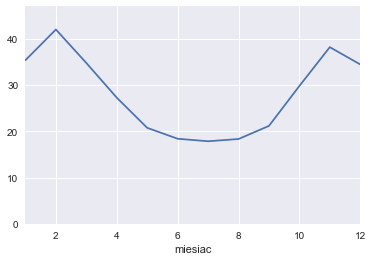

In [35]:
pm25_mies.plot(ylim = ( 0, max(pm25_mies)+5 ) )

Zauważmy, że smog jest spory tylko dla miesiecy jesienno-zimowych.
Ale narazie nie usuwam.

#### Brakujące dane

In [36]:
#ind_brakujacych = set()
#for i in range()
braki1 = df1.pm25_sr_niep[df1["pm25_sr_niep"].isnull()].index.values
len(braki1)

109

In [37]:
braki1

array([ 165,  616,  617,  618,  675,  676,  677,  678,  679,  680,  681,
        682,  683,  684,  685,  686,  687,  688,  689,  690,  691,  692,
        693,  694,  695,  696,  697,  698,  699,  700,  701,  702,  703,
        704,  705,  706,  707,  708,  709,  710,  711,  712,  713,  714,
        715,  716,  717,  718,  719,  720,  721,  722,  723,  724,  725,
        726,  727,  728,  729,  730,  731,  732,  733,  734,  735,  736,
        737,  738,  739,  740,  741,  947,  948,  949,  950,  951,  952,
        953,  954,  955, 1002, 1003, 1004, 1005, 1086, 1087, 1321, 1322,
       1323, 1324, 1325, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356,
       1357, 1358, 1359, 1360, 1451, 1702, 1828, 1873, 1874, 1884], dtype=int64)

In [38]:
for i in range(7):
    print(df1.pm25_sr_niep[braki1[i] - 2 : braki1[i] + 3])
    print("------")

163    17.679167
164    26.408333
165          NaN
166    28.928571
167    30.162500
Name: pm25_sr_niep, dtype: float64
------
614    10.520000
615    17.271429
616          NaN
617          NaN
618          NaN
Name: pm25_sr_niep, dtype: float64
------
615    17.271429
616          NaN
617          NaN
618          NaN
619    22.333333
Name: pm25_sr_niep, dtype: float64
------
616          NaN
617          NaN
618          NaN
619    22.333333
620    22.579167
Name: pm25_sr_niep, dtype: float64
------
673    21.254167
674    19.410000
675          NaN
676          NaN
677          NaN
Name: pm25_sr_niep, dtype: float64
------
674    19.41
675      NaN
676      NaN
677      NaN
678      NaN
Name: pm25_sr_niep, dtype: float64
------
675   NaN
676   NaN
677   NaN
678   NaN
679   NaN
Name: pm25_sr_niep, dtype: float64
------


In [72]:
pd.set_option('display.max_rows', 125)
df1.iloc[braki1,:3]

,rok,miesiac,dzien
166,2011,6,16
620,2012,9,12
621,2012,9,13
622,2012,9,14
746,2013,1,16
747,2013,1,17
748,2013,1,18
749,2013,1,19
750,2013,1,20
751,2013,1,21


Duzo brakujacych danych pod rzad - tego nie przeskocze.
Usuwam rekordy bez danej objasnianej

In [40]:
pd.set_option('display.max_rows', 25)

In [41]:
df1.describe()
# NaNy tylko w obj

,rok,miesiac,dzien,max_temp,min_temp,sr_temp,min_temp_grunt,suma_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,sr_cisn_stacja,sr_cisn_morze,opad_dzien,opad_noc,pm25_sr_niep
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2083.000000
mean,2013.500456,6.521898,15.732664,13.802555,5.529653,9.509261,3.731296,1.500502,5.132436,3.217062,9.625912,75.624133,1003.593020,1016.600730,0.767609,0.732892,27.941433
std,1.708571,3.449773,8.803378,9.927203,7.836300,8.677988,7.973112,4.047243,2.064990,1.575590,4.482571,13.280940,8.029376,8.214315,2.769411,2.510494,16.281153
min,2011.000000,1.000000,1.000000,-14.600000,-23.100000,-18.400000,-24.200000,0.000000,0.000000,0.000000,1.100000,37.400000,966.200000,979.200000,0.000000,0.000000,4.120675
25%,2012.000000,4.000000,8.000000,6.100000,0.200000,3.000000,-1.400000,0.000000,3.800000,2.000000,6.200000,66.000000,998.600000,1011.400000,0.000000,0.000000,16.877962
50%,2013.500000,7.000000,16.000000,14.000000,5.500000,9.400000,3.700000,0.000000,5.400000,2.900000,8.800000,77.000000,1003.500000,1016.400000,0.000000,0.000000,23.480374
75%,2015.000000,10.000000,23.000000,22.025000,11.800000,16.700000,9.800000,1.200000,6.900000,4.000000,12.800000,86.400000,1008.500000,1021.600000,0.200000,0.200000,34.781250
max,2016.000000,12.000000,31.000000,37.000000,22.800000,29.300000,21.800000,75.800000,8.000000,10.300000,22.700000,100.000000,1029.800000,1043.700000,75.200000,34.700000,145.554167


In [60]:
df1 = df1.dropna(how='any')

### Inżynieria cech

In [43]:
df1.shape

(2083, 17)

Nie widze wartosci odstajacych, ale dla bezpieczenstwa sprawdzam rozklad

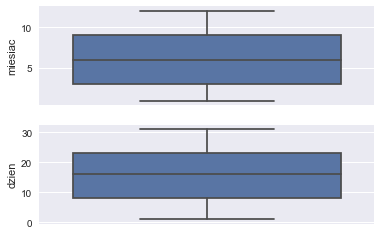

In [46]:
plt.figure(figsize=(5,50))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(y=df1.iloc[:,1], ax=ax1)
sns.boxplot(y=df1.iloc[:,2], ax=ax2)

In [61]:
#skosy

In [62]:
df1.columns

Index(['rok', 'miesiac', 'dzien', 'max_temp', 'min_temp', 'sr_temp',
       'min_temp_grunt', 'suma_opad', 'sr_zachm', 'sr_predk_wiatr', 'sr_cisn',
       'sr_wilg', 'sr_cisn_stacja', 'sr_cisn_morze', 'opad_dzien', 'opad_noc',
       'pm25_sr_niep'],
      dtype='object')

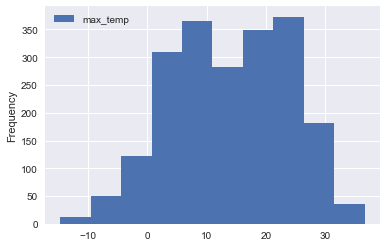

In [64]:
df1[["max_temp"]].plot.hist()

In [68]:
np.log(df1["max_temp"])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


0       0.832909
1       0.530628
2            NaN
3            NaN
4            NaN
5            NaN
6       1.740466
7       1.568616
8       1.435085
9       1.386294
10      0.336472
11      1.386294
          ...   
2180    0.832909
2181    0.405465
2182   -0.693147
2183    0.405465
2184    0.741937
2185    1.410987
2186    2.292535
2187    1.931521
2188    1.360977
2189    0.788457
2190    1.131402
2191    1.335001
Name: max_temp, Length: 2083, dtype: float64

In [ ]:
# standaryzacja1
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [ ]:
# tutaj

In [ ]:
# normalizacja 0-1
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)
# gdzie X cala ramka

In [ ]:
# standaryzacja
standardized_X = preprocessing.scale(X)

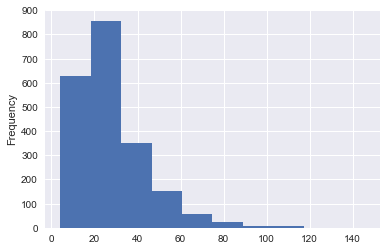

In [47]:
df1["pm25_sr_niep"].plot.hist()

In [48]:
df.skew()

rok                0.000320
miesiac           -0.008913
dzien              0.006510
max_temp          -0.139251
min_temp          -0.365858
sr_temp           -0.231074
min_temp_grunt    -0.364921
suma_opad          6.369068
sr_zachm          -0.539595
sr_predk_wiatr     1.019827
sr_cisn            0.514228
sr_wilg           -0.355273
sr_cisn_stacja    -0.043165
sr_cisn_morze      0.038303
opad_dzien        11.714206
opad_noc           6.545954
pm10_sr_niep       1.663028
pm10_sr_wok        1.999533
pm25_sr_niep       1.769905
pm25_sr_wok        2.170690
pm10_8_niep        2.024678
pm10_8_wok         2.795783
pm25_8_niep        2.556551
pm25_8_wok         3.227397
dtype: float64

Wnioski:

In [49]:
# poprawic

In [50]:
# ....

In [51]:
df1

,rok,miesiac,dzien,max_temp,min_temp,sr_temp,min_temp_grunt,suma_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,sr_cisn_stacja,sr_cisn_morze,opad_dzien,opad_noc,pm25_sr_niep
0,2011,1,1,2.3,-2.1,0.9,-3.3,0.1,7.1,6.9,5.7,86.8,992.2,1005.5,0.1,0.0,21.182609
1,2011,1,2,1.7,-1.8,-1.1,-2.9,1.2,7.4,5.6,4.8,85.3,997.0,1010.4,0.8,0.4,13.600000
2,2011,1,3,-1.5,-3.6,-2.9,-4.9,0.3,7.3,3.8,4.5,90.1,1004.0,1017.6,0.3,0.0,27.470833
3,2011,1,4,-2.0,-5.1,-4.6,-6.0,0.0,6.0,2.1,3.7,84.0,1007.3,1021.0,0.0,0.0,36.000000
4,2011,1,5,-3.5,-12.4,-8.3,-15.5,0.0,6.3,1.6,2.9,88.5,1007.8,1021.7,0.0,0.0,79.829167
5,2011,1,6,-0.2,-11.7,-5.4,-13.6,1.8,4.6,3.6,3.4,80.5,1000.7,1014.4,0.0,1.8,50.995833
6,2011,1,7,5.7,-0.2,3.2,-0.9,0.0,7.6,2.9,6.8,87.9,999.3,1012.6,0.0,0.0,43.612500
7,2011,1,8,4.8,1.7,3.1,0.4,0.6,7.5,2.3,7.1,93.6,1000.9,1014.2,0.6,0.0,53.066667
8,2011,1,9,4.2,1.1,2.6,-0.4,0.0,5.8,1.8,7.2,98.3,1001.1,1014.4,0.0,0.0,41.137500
9,2011,1,10,4.0,-1.2,1.4,-4.5,1.6,7.0,1.5,6.6,98.1,1008.9,1022.3,1.6,0.0,49.200000


In [52]:
df1.columns

Index(['rok', 'miesiac', 'dzien', 'max_temp', 'min_temp', 'sr_temp',
       'min_temp_grunt', 'suma_opad', 'sr_zachm', 'sr_predk_wiatr', 'sr_cisn',
       'sr_wilg', 'sr_cisn_stacja', 'sr_cisn_morze', 'opad_dzien', 'opad_noc',
       'pm25_sr_niep'],
      dtype='object')

In [53]:
df1.iloc[:,15].name
# 17-24

'opad_noc'

In [54]:
# korelacje temperatur
df1[["max_temp", "min_temp", "sr_temp", "min_temp_grunt"]].corr(method='pearson')

,max_temp,min_temp,sr_temp,min_temp_grunt
max_temp,1.000000,0.919009,0.985170,0.871606
min_temp,0.919009,1.000000,0.962496,0.986660
sr_temp,0.985170,0.962496,1.000000,0.925171
min_temp_grunt,0.871606,0.986660,0.925171,1.000000


In [55]:
# mocno skorelowane, zostawiam tylko sr_temp
df1 = df1.drop(["max_temp", "min_temp", "min_temp_grunt"], axis=1)

In [64]:
# korelacje opadów
df1[["suma_opad", "opad_dzien", "opad_noc"]].corr(method='pearson')

,suma_opad,opad_dzien,opad_noc
suma_opad,1.000000,0.799885,0.728850
opad_dzien,0.799885,1.000000,0.172087
opad_noc,0.728850,0.172087,1.000000


In [65]:
# mimo iz dzien i noc nieskorelowane to suma_opad dobrze okresla zaleznosc
df1 = df1.drop(["opad_dzien", "opad_noc"], axis=1)

In [67]:
# korelacje cisnien
df1[["sr_cisn", "sr_cisn_stacja", "sr_cisn_morze"]].corr(method='pearson')

,sr_cisn,sr_cisn_stacja,sr_cisn_morze
sr_cisn,1.000000,-0.205312,-0.247039
sr_cisn_stacja,-0.205312,1.000000,0.998823
sr_cisn_morze,-0.247039,0.998823,1.000000


In [69]:
# mimo iz nieskorelowane, to cisn na poz stacji i na poz morza jest niepodawane w prognozach, wiec usuwam
df1 = df1.drop(["sr_cisn_stacja", "sr_cisn_morze"], axis=1)

In [71]:
# kor wilgotnosci i opadow
df1[["suma_opad", "sr_wilg"]].corr(method='pearson')

# nieskorelowane, zostawiam

,suma_opad,sr_wilg
suma_opad,1.00000,0.20778
sr_wilg,0.20778,1.00000


In [72]:
df1.columns

Index(['rok', 'miesiac', 'dzien', 'sr_temp', 'suma_opad', 'sr_zachm',
       'sr_predk_wiatr', 'sr_cisn', 'sr_wilg', 'pm25_sr_niep'],
      dtype='object')

### Model

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [73]:
df1.head(10)

,rok,miesiac,dzien,sr_temp,suma_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg,pm25_sr_niep
0,2011,1,1,0.9,0.1,7.1,6.9,5.7,86.8,21.182609
1,2011,1,2,-1.1,1.2,7.4,5.6,4.8,85.3,13.600000
2,2011,1,3,-2.9,0.3,7.3,3.8,4.5,90.1,27.470833
3,2011,1,4,-4.6,0.0,6.0,2.1,3.7,84.0,36.000000
4,2011,1,5,-8.3,0.0,6.3,1.6,2.9,88.5,79.829167
5,2011,1,6,-5.4,1.8,4.6,3.6,3.4,80.5,50.995833
6,2011,1,7,3.2,0.0,7.6,2.9,6.8,87.9,43.612500
7,2011,1,8,3.1,0.6,7.5,2.3,7.1,93.6,53.066667
8,2011,1,9,2.6,0.0,5.8,1.8,7.2,98.3,41.137500
9,2011,1,10,1.4,1.6,7.0,1.5,6.6,98.1,49.200000


In [75]:
X = df1.iloc[:,:-1]
X.head(6)

,rok,miesiac,dzien,sr_temp,suma_opad,sr_zachm,sr_predk_wiatr,sr_cisn,sr_wilg
0,2011,1,1,0.9,0.1,7.1,6.9,5.7,86.8
1,2011,1,2,-1.1,1.2,7.4,5.6,4.8,85.3
2,2011,1,3,-2.9,0.3,7.3,3.8,4.5,90.1
3,2011,1,4,-4.6,0.0,6.0,2.1,3.7,84.0
4,2011,1,5,-8.3,0.0,6.3,1.6,2.9,88.5
5,2011,1,6,-5.4,1.8,4.6,3.6,3.4,80.5


In [77]:
y = df1.iloc[:,-1]
y.head(6)

0    21.182609
1    13.600000
2    27.470833
3    36.000000
4    79.829167
5    50.995833
Name: pm25_sr_niep, dtype: float64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [122]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1666, 9) (1666,)
(417, 9) (417,)


In [85]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [86]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cpts = pd.DataFrame(pca.transform(X_train))
x_axis = np.arange(1, pca.n_components_+1)
pca_scaled = PCA()
pca_scaled.fit(X_train_scaled)
cpts_scaled = pd.DataFrame(pca.transform(X_train_scaled))

In [123]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

In [124]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.576
Test data R-2 score: 0.548
Test data Spearman correlation: 0.798
Test data Pearson correlation: 0.75


In [92]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [125]:
scores = cross_val_score(rf, X, y, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.40636261  0.50874317  0.44753863  0.49462396  0.52665193  0.56737347]


## 4. Model predykcyjny

In [142]:
df1 = df1[(df1.miesiac != 4) & (df1.miesiac != 5) (df1.miesiac != 6) & (df1.miesiac != 7) & (df1.miesiac != 8) & (df1.miesiac != 9)]

TypeError: 'Series' object is not callable

## 5. Testowanie

In [139]:
df1.miesiac.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## 6. Podsumowanie

In [ ]:
(df.a != -1) & (df.b != -1)
df1 = df1[(df1.miesiac != 4) & (df1.miesiac != 5) (df1.miesiac != 6) & (df1.miesiac != 7) & (df1.miesiac != 8) & (df1.miesiac != 9)]

### CAŁOŚĆ